In [1]:
from sklearn.isotonic import isotonic_regression
import cvxpy as cp
import numpy as np
import csv, os
from scipy import stats
from sklearn import metrics
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statistics
from scipy.stats import levene
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

# Set the text properties to use LaTeX fonts with Computer Modern
plt.rcParams.update({
    'text.usetex': True,  # Use LaTeX for rendering text
    'font.family': 'serif',  # Use a serif font family (which will be Computer Modern)
    'font.serif': ['Computer Modern Roman'],  # Explicitly use the Computer Modern font
    'axes.unicode_minus': False,  # Ensure minus signs are displayed correctly
    'font.size': 20,  #In a row, use 20 for single picture, # 30 for double figures, # 55 for four figures
    'figure.figsize': (13, 8),  # Figure size in inches
    'figure.dpi': 300,  # Dots per inch (high resolution)
})

def format_func(value, tick_number):
    if value < 10:
        return f"{value:.2f}"
    elif value < 100:
        return f"{value:.1f}"
    else:
        return f"{int(value)}"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb
  poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils tex-common
  tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-framework-java l

In [2]:
# Load CSV file into a pandas DataFrame
df = pd.read_csv(r'/content/drive/MyDrive/Research/ICML_2023_Result/proxy_score.csv')
df = df.drop_duplicates(['submission_idx', 'author_idx'])


# For each author, list its ranked submissions according to its ranking
author_submission_rank_4 = {}

# Extract the unique authors from the DataFrame
authors = df['author_id'].unique()

# Loop through every submission
for author in authors:

    author_submission_rank_4[author] = []

    # Extract the rating as sets
    submissions = df[df['author_id'] == author]['submission_id'].tolist()

    for i in range(len(submissions)):

        rank = df[(df['submission_id'] == submissions[i]) & (df['author_id'] == author)]['rank'].tolist()
        rank = rank[0]

        # Add the ratings to the results dictionary
        author_submission_rank_4[author].append((submissions[i], rank))

def sort_submissions(author_submission_rank_4):
    for author in author_submission_rank_4:
        author_submission_rank_4[author].sort(key=lambda x: x[1], reverse=False)
    return author_submission_rank_4

author_submission_rank_4 = sort_submissions(author_submission_rank_4)


High_submission_list = []
Low_submission_list = []
for author in author_submission_rank_4:
    # for i in range(len(author_submission_rank_4[author]) - 1):
        High_submission_list.append(author_submission_rank_4[author][0][0] )
        Low_submission_list.append(author_submission_rank_4[author][-1][0] )


submissions = df['submission_id'].unique()

High_ratings = []
# Loop through every submission
for submission in High_submission_list:
  rating = df[df['submission_id'] == submission]['rating_0312_mean'].tolist()[0]
  High_ratings.append(rating)

Low_ratings = []
# Loop through every submission
for submission in Low_submission_list:
  rating = df[df['submission_id'] == submission]['rating_0312_mean'].tolist()[0]
  Low_ratings.append(rating)


print(np.mean(High_ratings))
print(np.mean(Low_ratings))


4.803519900491045
4.503967661686567


In [3]:
from sklearn.isotonic import isotonic_regression
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load CSV file into a pandas DataFrame
df = pd.read_csv(r'/content/drive/MyDrive/Research/ICML_2023_Result/proxy_score.csv')
df = df.drop_duplicates(['submission_idx', 'author_idx'])

# For each author, list its ranked submissions according to its ranking
author_submission_rank_4 = {}
authors = df['author_id'].unique()

for author in authors:
    author_submission_rank_4[author] = []
    submissions = df[df['author_id'] == author]['submission_id'].tolist()

    for i in range(len(submissions)):
        rank = df[(df['submission_id'] == submissions[i]) & (df['author_id'] == author)]['rank'].tolist()[0]
        author_submission_rank_4[author].append((submissions[i], rank))

def sort_submissions(author_submission_rank_4):
    for author in author_submission_rank_4:
        author_submission_rank_4[author].sort(key=lambda x: x[1], reverse=False)
    return author_submission_rank_4

author_submission_rank_4 = sort_submissions(author_submission_rank_4)

gap_high = {k: [] for k in range(2, 18)}
gap_low = {k: [] for k in range(2, 18)}

for author in author_submission_rank_4:
    sub_count = len(set([s[0] for s in author_submission_rank_4[author]]))
    if sub_count in gap_high:
        best_submission = author_submission_rank_4[author][0][0]
        worst_submission = author_submission_rank_4[author][-1][0]

        best_rating = df[df['submission_id'] == best_submission]['rating_0312_mean'].tolist()[0]
        worst_rating = df[df['submission_id'] == worst_submission]['rating_0312_mean'].tolist()[0]

        gap_high[sub_count].append(best_rating)
        gap_low[sub_count].append(worst_rating)

avg_gap_high = {k: np.mean(v) if v else None for k, v in gap_high.items()}
avg_gap_low = {k: np.mean(v) if v else None for k, v in gap_low.items()}



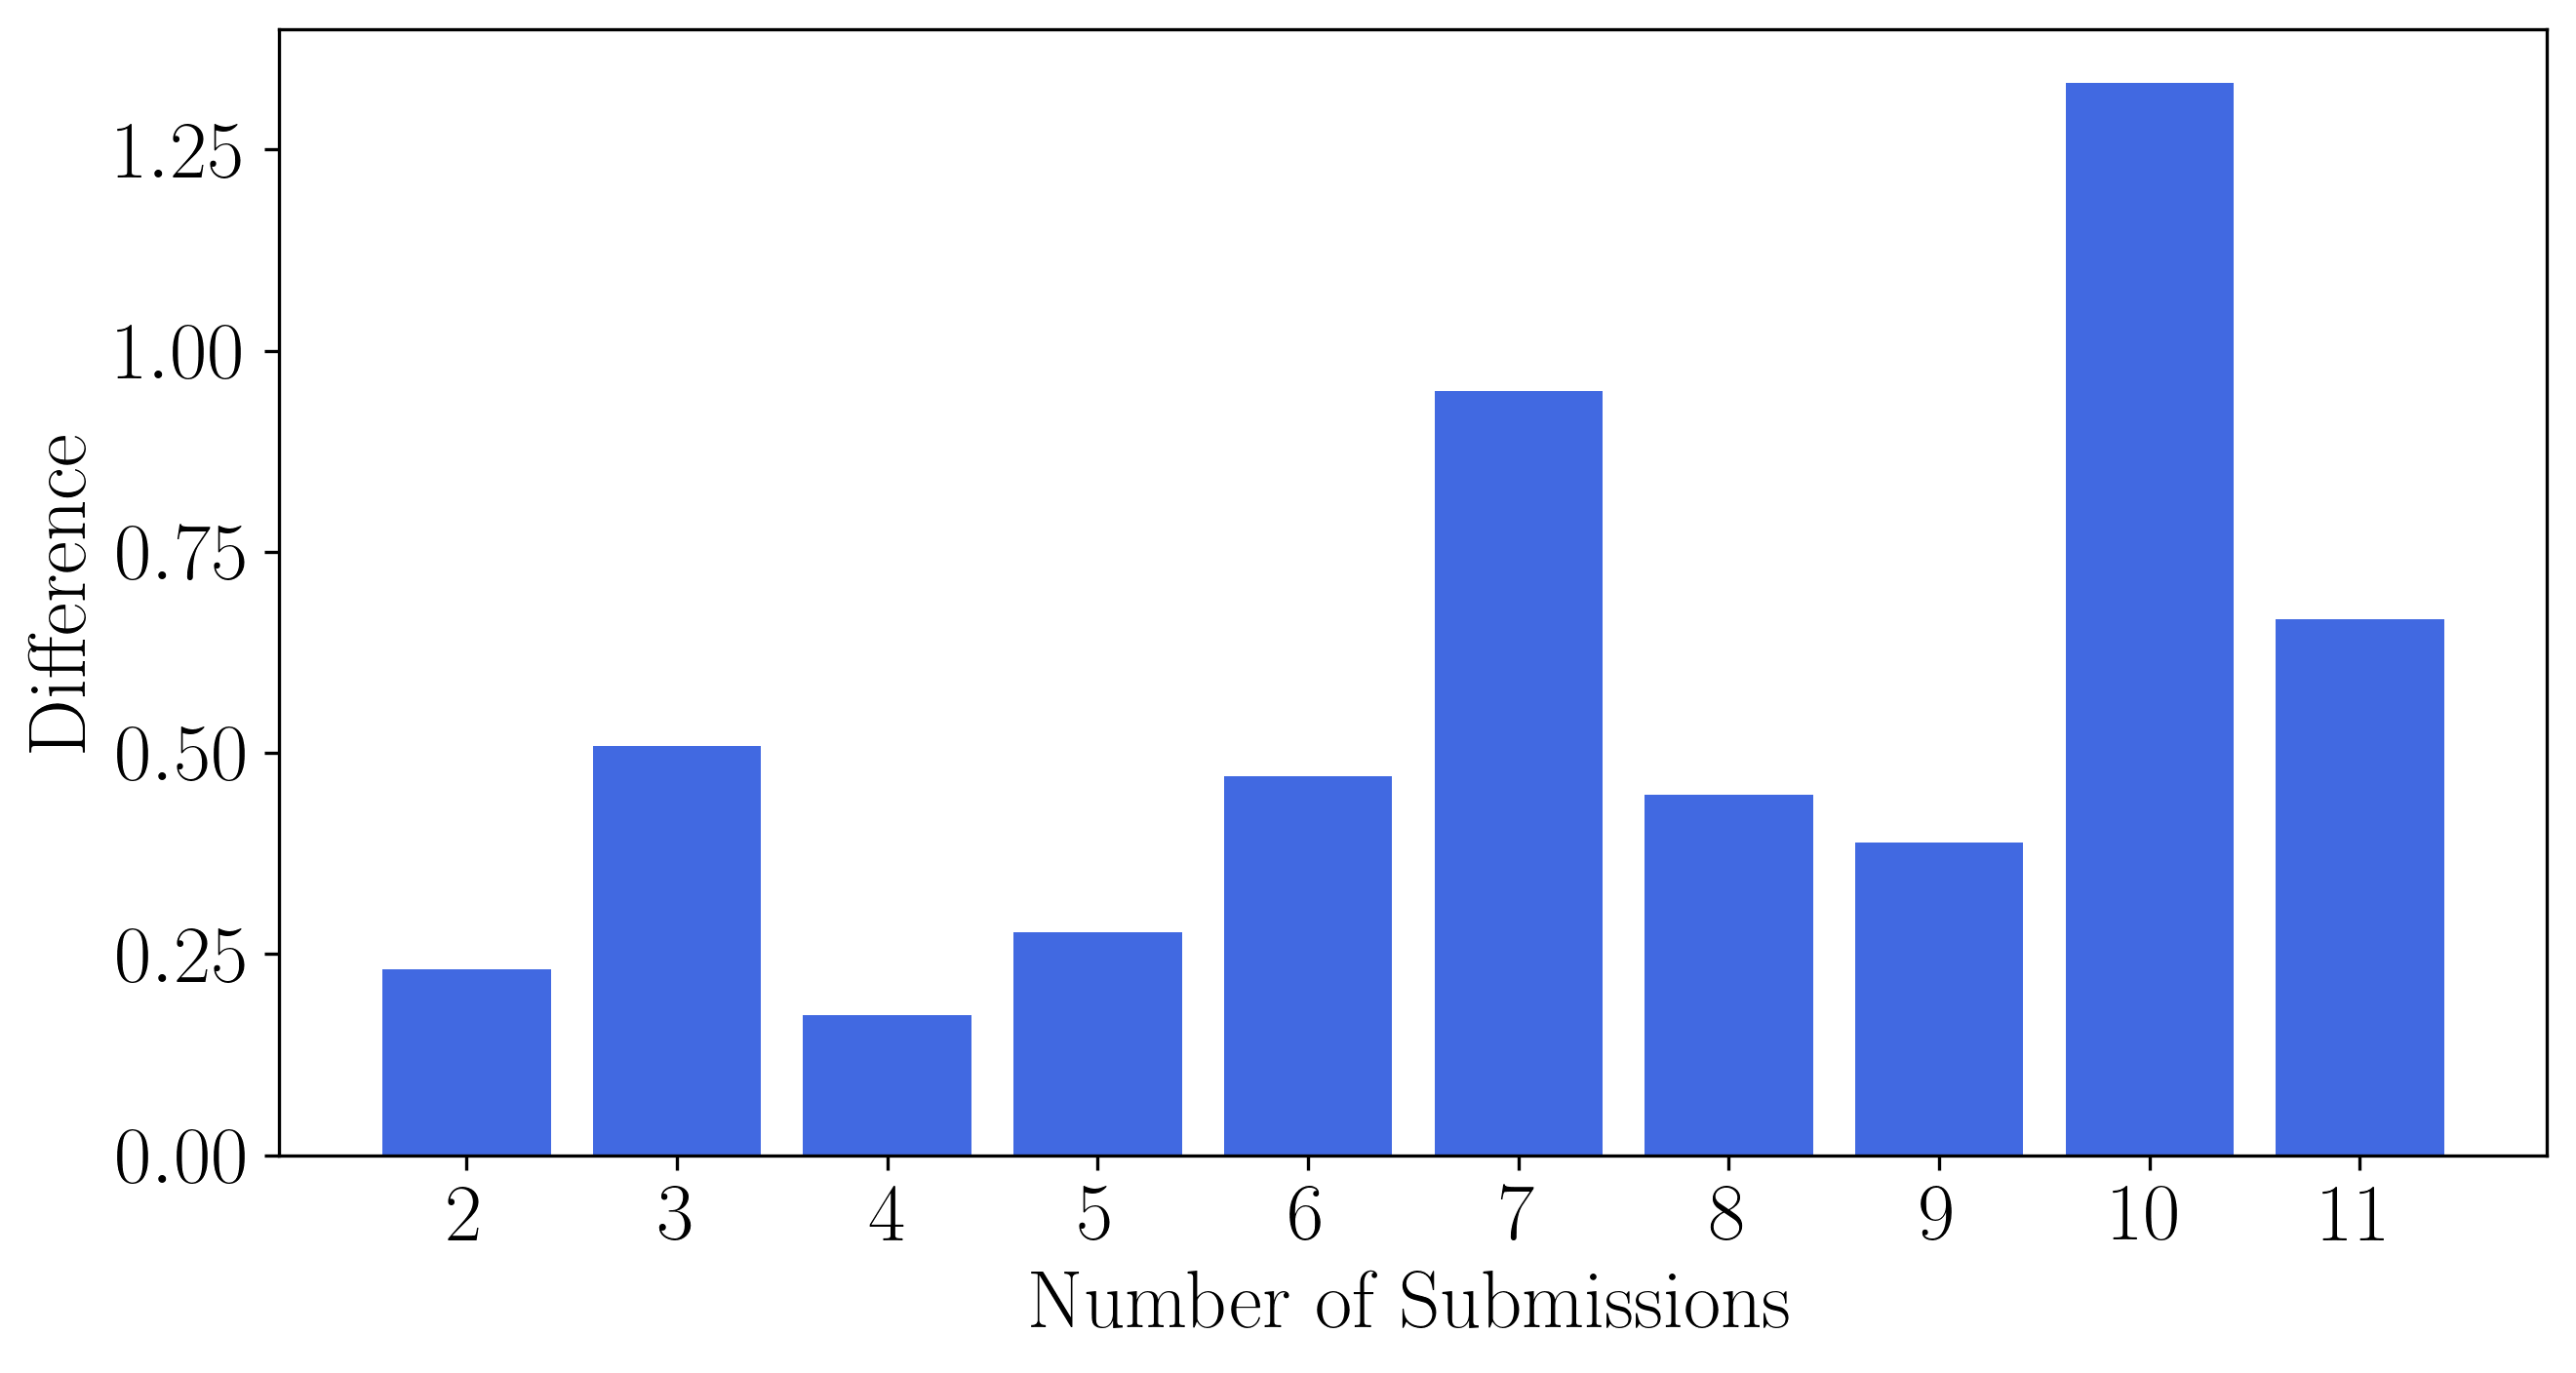

In [4]:
gap_difference = {k: (avg_gap_high[k] - avg_gap_low[k]) for k in range(2, 12)}

plt.figure(figsize=(10, 5))
plt.bar(gap_difference.keys(), gap_difference.values(), color='royalblue')
plt.xlabel("Number of Submissions")
plt.ylabel("Difference")
# plt.title("")
plt.xticks(list(gap_difference.keys()))

plt.savefig('/content/drive/MyDrive/Research/ICML_2023_Result/Figures/difference_no_submission.pdf', bbox_inches='tight')
plt.show()
